#Machine Problem No. 3: K-Nearest Neighbors (KNN) Classifier on Breast Cancer Diagnosis Dataset

**Objective:**

The goal of this task is to assess your ability to apply the K-Nearest Neighbors (KNN) algorithm to predict
breast cancer diagnosis based on tumor characteristics. You will preprocess the dataset, implement the
KNN algorithm, and evaluate its performance. You are also required to compare the KNN model with a
Logistic Regression model.

**1. Data Exploration and Preprocessing**

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer


*Load dataset*

In [22]:
data = pd.read_csv('Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')

*Exploratory Data Analysis (EDA)*

In [21]:
print(data.head(10))

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0        NaN        17.99         10.38          122.80     1001.0   
1        NaN        20.57         17.77          132.90     1326.0   
2        NaN        19.69         21.25          130.00     1203.0   
3        NaN        11.42         20.38           77.58      386.1   
4        NaN        20.29         14.34          135.10     1297.0   
5        NaN        12.45         15.70           82.57      477.1   
6        NaN        18.25         19.98          119.60     1040.0   
7        NaN        13.71         20.83           90.20      577.9   
8        NaN        13.00         21.82           87.50      519.8   
9        NaN        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017  

In [23]:
print(data.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [24]:
data = data.drop(columns=['id', 'Unnamed: 32'])

*Converting diagnosis column to numerical values (Malignant=1, Benign=0)*

In [25]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

*Check for missing values*

In [26]:
print(data.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


*Visualization*

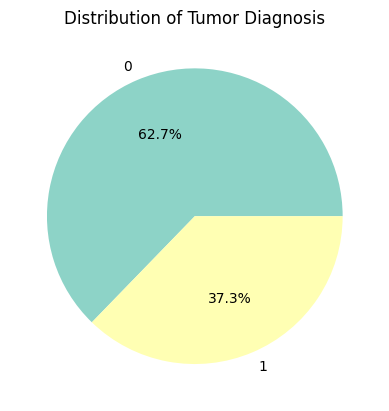

In [32]:
data['diagnosis'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Distribution of Tumor Diagnosis')
plt.ylabel('')
plt.show()


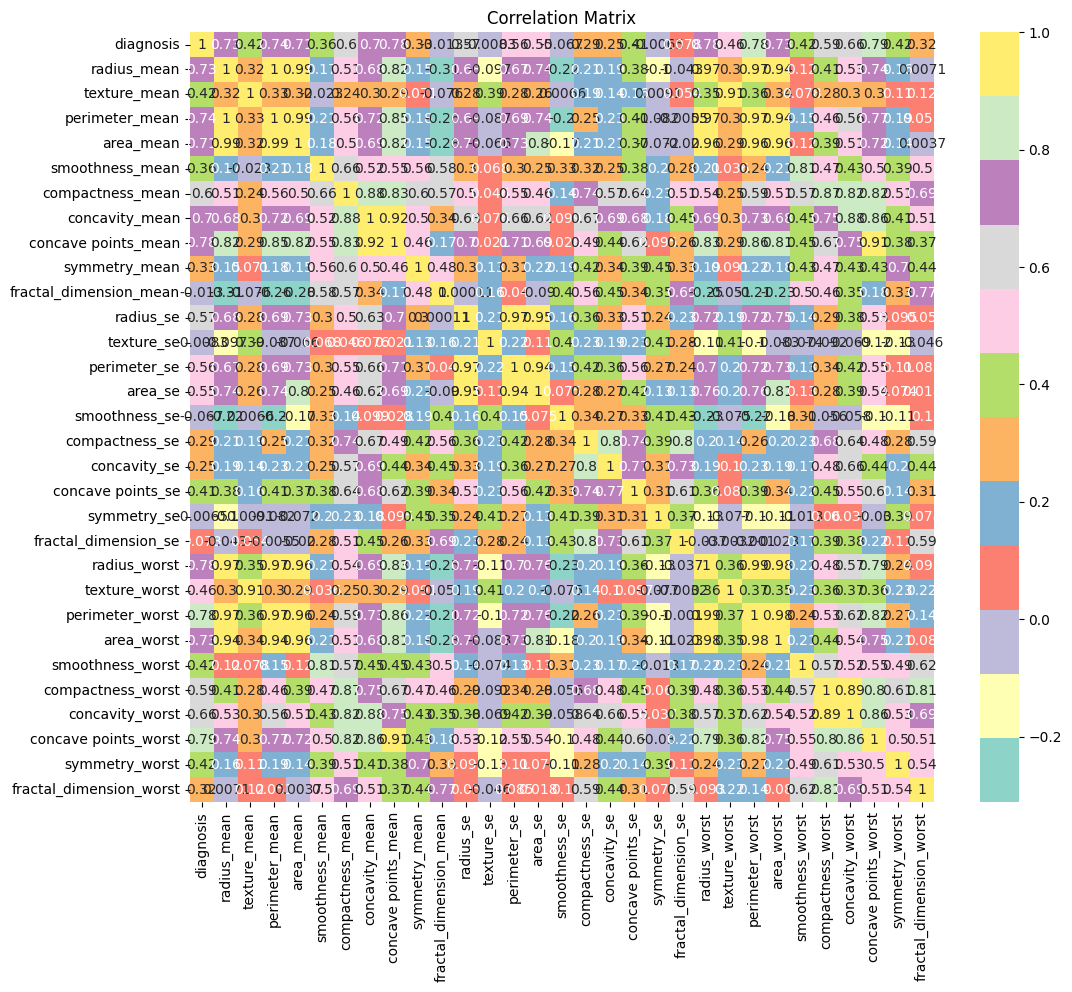

In [37]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='Set3')
plt.title('Correlation Matrix')
plt.show()

*Split the data*

In [38]:
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

*Normalize/scale the data*

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

*Train-test split*

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


**2. Model Development**

*K-Nearest Neighbors (KNN) Model*

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)


knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [43]:
y_pred_knn = knn.predict(X_test)

*Logistic Regression Model*

In [46]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [47]:
y_pred_log_reg = log_reg.predict(X_test)

**3. Model Evaluation**

*Evaluating KNN and Logistic Regression Models*

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

print("KNN Performance:")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1-Score: {f1_knn}\n")

print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_log_reg}")
print(f"Precision: {precision_log_reg}")
print(f"Recall: {recall_log_reg}")
print(f"F1-Score: {f1_log_reg}")


KNN Performance:
Accuracy: 0.9473684210526315
Precision: 0.9302325581395349
Recall: 0.9302325581395349
F1-Score: 0.9302325581395349

Logistic Regression Performance:
Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1-Score: 0.9647058823529412


*Confusion Matrix for both models*

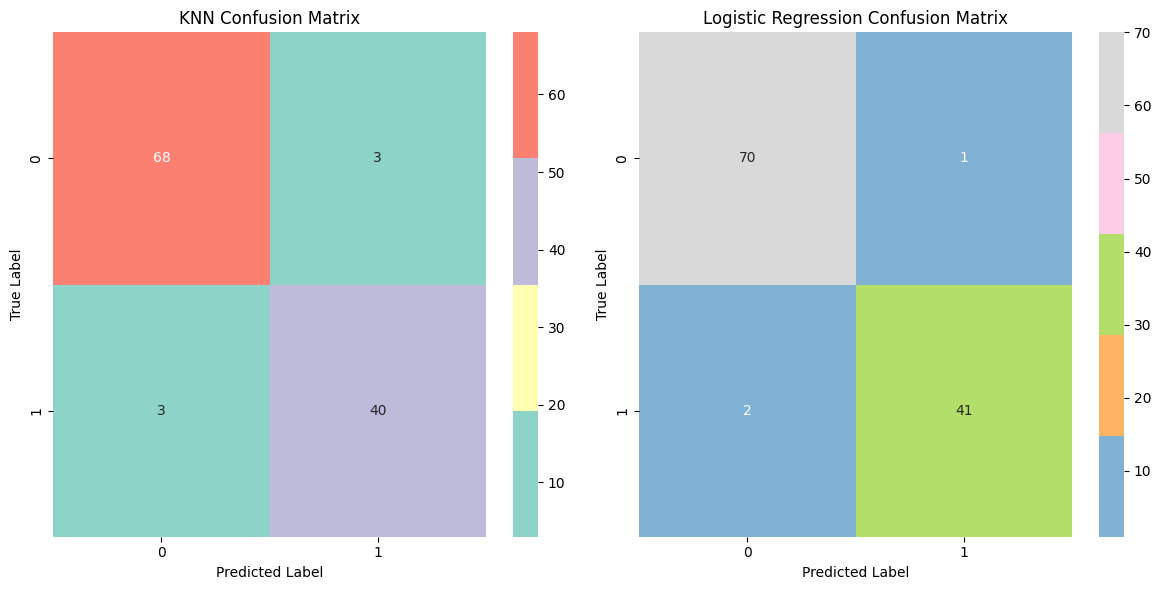

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

plt.figure(figsize=(12, 6))

palette = sns.color_palette('Set3', 9)

plt.subplot(1, 2, 1)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap=palette[:4])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 2, 2)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap=palette[4:])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()


**4. Report and Visualizations**

*Decision boundaries visualization*

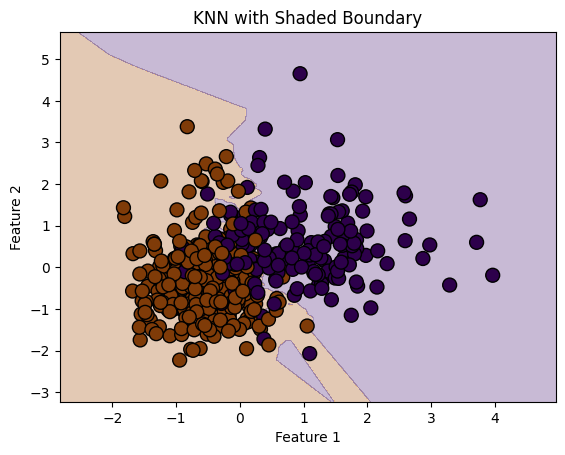

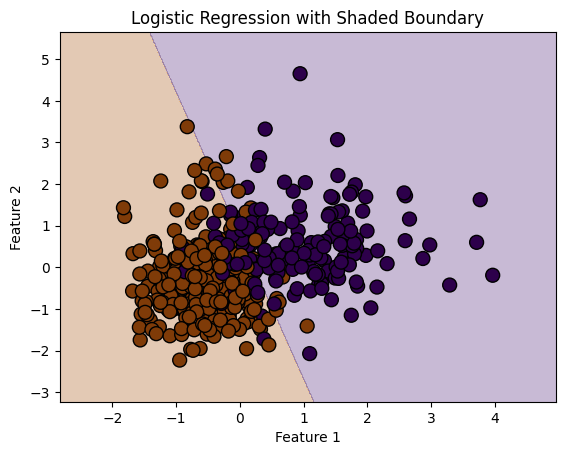

In [62]:
def plot_decision_boundary_shaded(X, y, classifier, title):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.3, cmap=plt.cm.PuOr)

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=plt.cm.PuOr, s=100, edgecolor='k')

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary_shaded(X_train_2d, y_train, knn_2d, title="KNN with Shaded Boundary")

plot_decision_boundary_shaded(X_train_2d, y_train, log_reg_2d, title="Logistic Regression with Shaded Boundary")


In [ ]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

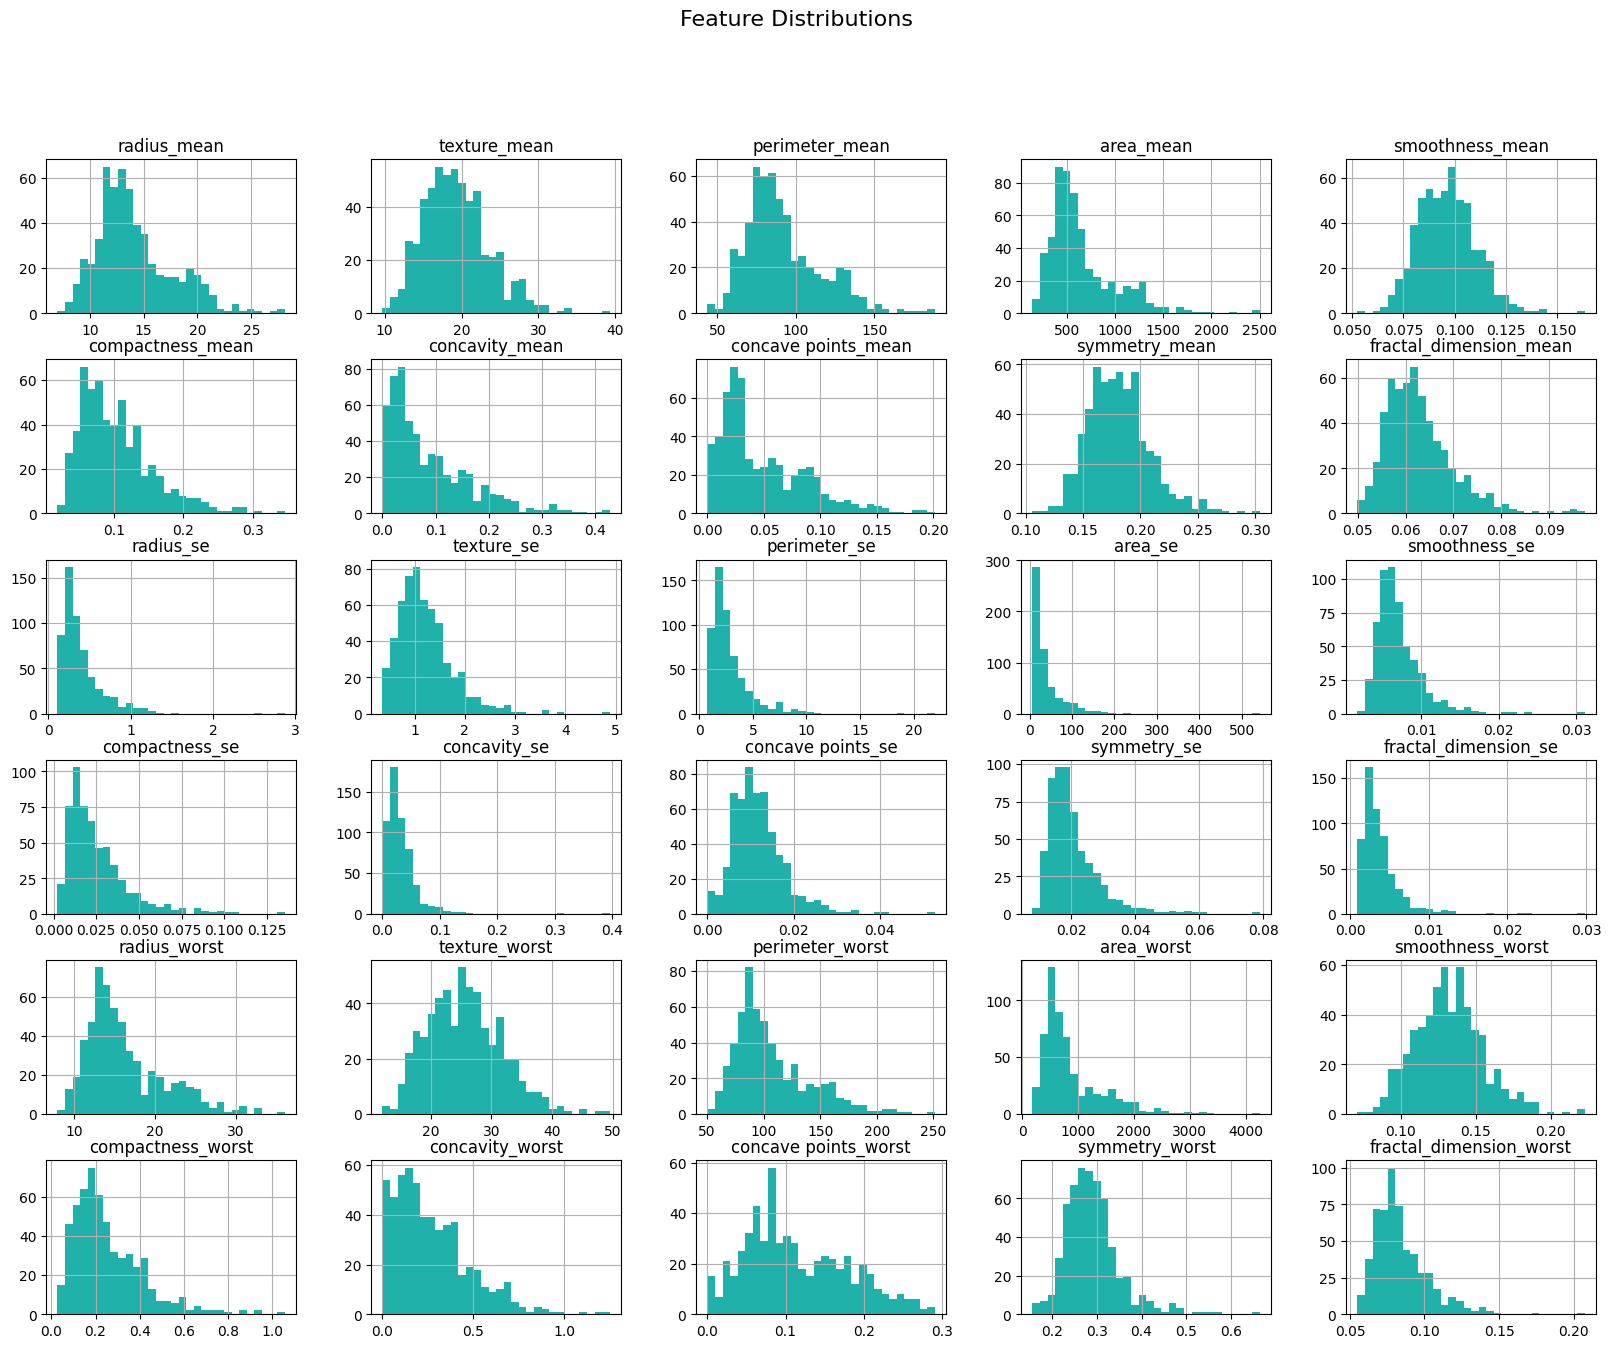

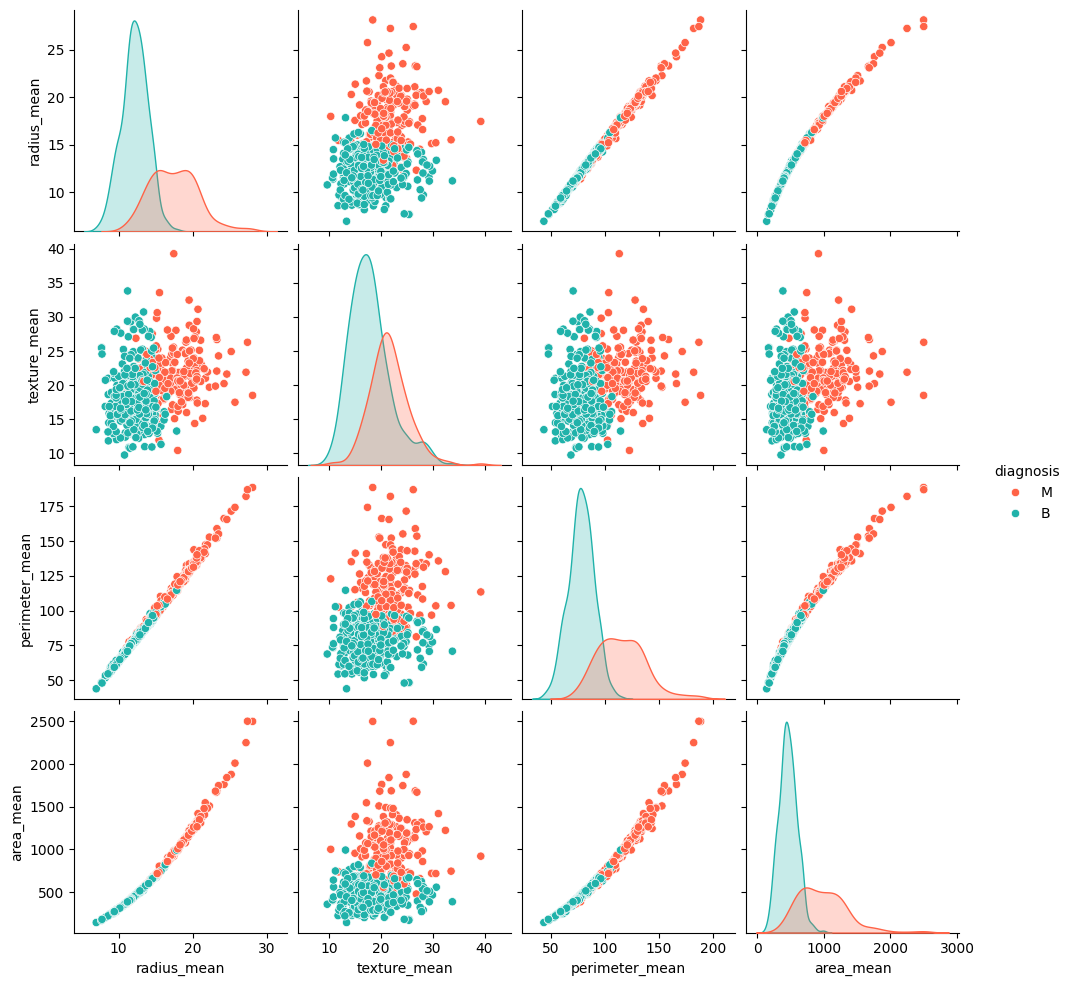

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

data.hist(bins=30, figsize=(20, 15), color='lightseagreen')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

custom_palette = {'M': 'tomato', 'B': 'lightseagreen'}

sns.pairplot(data[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']],
             hue='diagnosis', palette=custom_palette)
plt.show()


#Conclusion

I used K-Means clustering to group data from a breast cancer dataset based on tumor characteristics. The goal was to find patterns in the data that could help in understanding different types of tumors.

*Data Preprocessing:*

First, I cleaned the dataset:

I removed an unnecessary column and dropped any rows with missing data.
I converted the diagnosis column into numbers: 0 for benign (non-cancerous) and 1 for malignant (cancerous).
I normalized the data to make sure all features were on the same scale, which is important for the K-Means algorithm to work properly.

*Model Implementation:*

I applied the K-Means algorithm, starting with 3 clusters (k=3). This divided the data into three groups. I also tested other values for k (2, 3, 4, and 5) to find the best number of clusters.

*Finding the Best Number of Clusters:*
I used two methods to decide how many clusters worked best:

Elbow Method: This method showed that k=3 was a good choice because the improvement slowed down after this point.
Silhouette Score: This score measures how well the clusters are separated. I found that the highest score came when using k=3, confirming that 3 clusters made the most sense.

*Model Evaluation*
To check how well the model worked, I used:

Inertia: This tells me how close the data points are to the center of their cluster. For k=3, the result showed a good fit.
Silhouette Score: This score was high, meaning the clusters were distinct and well-separated.

*Cluster Visualization*

I created scatter plots to see how the clusters looked. For example, when plotting radius_mean against texture_mean, the three clusters were clearly separated. A pair plot also showed how the data divided across several features.

*Cluster Characteristics*

I analyzed the clusters and found:

Cluster 0: This group had larger tumors, with high values for features like radius_mean and area_mean.
Cluster 1: These tumors were smaller, likely benign.
Cluster 2: Tumors in this cluster had medium-sized values, somewhere between the other two clusters.

*Conclusion*

Using K-Means clustering, I divided the dataset into three clear groups based on tumor characteristics. The best number of clusters was k=3, as determined by both the Elbow Method and Silhouette Score. These clusters could help in understanding tumor types and might support medical decision-making.